In [1]:
import pandas as pd

In [1]:
# from googletrans import Translator
# translator = Translator()


In [2]:
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

In [6]:
vader = SentimentIntensityAnalyzer()

In [7]:
def vader_polarity(text):
    """ Transform the output to a binary 0/1 result """
    score = vader.polarity_scores(text)
    total_positive_score = score['pos']
    total_negative_score = score['neg']
    total_neutral_score = score['neu']
    compound_score = score['compound']
    #print "Positive Score: %s, Negative Score: %s, Neutral Score: %s, Compound Score: %s"% (pos_score, neg_score, neu_score, compound_score)
    
    #if score['compound'] >= 0.5:
     #   sentiment = 'Positive'
    #elif score['compound'] > -0.5 and score['compound'] < 0.5:
     #   sentiment = 'Neutral'
    #elif score['compound'] <= -0.5:
     #   sentiment = 'Negative'
    
    #print sentiment, ",", pos_score, ",", neg_score, ",", neu_score, ",", compound_score
    
    if (total_neutral_score > 1 and total_positive_score > total_negative_score and total_positive_score >= total_neutral_score):
        sentiment = 1
    elif (total_neutral_score > 1 and total_negative_score > total_positive_score and total_negative_score >= total_neutral_score):
        sentiment = -1
    elif (total_neutral_score > 1 and total_neutral_score > total_positive_score and total_neutral_score > total_negative_score):
        sentiment = 0
    elif (total_neutral_score > 1 and total_negative_score == total_positive_score and total_negative_score >= total_neutral_score):
        sentiment = 0
    elif (total_neutral_score <= 1 and total_positive_score == total_negative_score and total_positive_score == total_neutral_score):
        sentiment = 0
    elif (total_neutral_score <= 1 and total_positive_score > total_negative_score):
        sentiment = 1
    elif (total_neutral_score <= 1 and total_negative_score > total_positive_score):
        sentiment = -1
    else:
        if score['compound'] >= 0.5:
            sentiment = 1
        elif score['compound'] > -0.5 and score['compound'] < 0.5:
            sentiment = 0
        elif score['compound'] <= -0.5:
            sentiment = -1
    return sentiment

In [5]:
# iran= pd.read_csv('./data/iran_sample.csv', delimiter=',', error_bad_lines=False)
russia= pd.read_csv('./data/unhashed/russia_201901_1_tweets_csv_unhashed.csv', dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": str,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})
# venez= pd.read_csv('./data/ven_sample.csv', delimiter=',', error_bad_lines=False)


In [6]:
russia = russia[russia.account_language == 'en']

In [7]:
russia.shape

(755052, 30)

In [8]:
hashtags_list_df = russia.loc[russia.hashtags.apply( lambda hashtags_list: hashtags_list !=[] ),['hashtags','tweet_text']]

hashtags_list_df = hashtags_list_df.dropna()

hashtags_list_df['hashtags'] = [x.replace('[','').replace(']','').strip() for x in hashtags_list_df.hashtags]

hashtags_list_df.hashtags = hashtags_list_df.hashtags.replace('',np.nan)

hashtags_list_df = hashtags_list_df.dropna()

hashtags_list_df['ht_list'] = [x.replace('[','').replace(']','').split(',') for x in hashtags_list_df.hashtags]

# hashtags_list_df

In [10]:
hashtags_list_df.head()

,hashtags,tweet_text,ht_list
2,IslamIsTheProblem,"RT @PigeonToday: Call me a hater if you want, ...",[IslamIsTheProblem]
5,"CrookedHillary, LyingHillary, NeverHillary",RT @WillysBaldSpot: #CrookedHillary #LyingHill...,"[CrookedHillary, LyingHillary, NeverHillary]"
7,AnjemChoudary,RT @ElianaBenador: FINALLY‼️\n\nRABID ISLAMIST...,[AnjemChoudary]
9,"terrorists, IslamExposed, MyJihad, STOPIslam, ...",RT @CathyTo47590555: #terrorists #IslamExposed...,"[terrorists, IslamExposed, MyJihad, STOPIsl..."
11,morningjoe,RT @DBloom451: #morningjoe CLOWNS open their s...,[morningjoe]


In [9]:
hashtags_list_df['size'] = [len(x) for x in hashtags_list_df.ht_list]

In [10]:
hashtags_list_df_more = hashtags_list_df[hashtags_list_df['size'] > 1]

In [11]:
hashtags_list_df_more.shape

(210064, 4)

In [14]:
hashtags_list_df_more.head()

,hashtags,tweet_text,ht_list,size
5,"CrookedHillary, LyingHillary, NeverHillary",RT @WillysBaldSpot: #CrookedHillary #LyingHill...,"[CrookedHillary, LyingHillary, NeverHillary]",3
9,"terrorists, IslamExposed, MyJihad, STOPIslam, ...",RT @CathyTo47590555: #terrorists #IslamExposed...,"[terrorists, IslamExposed, MyJihad, STOPIsl...",8
14,"BlueLivesMatter, PJNET",RT @RacySicilian: MT @HappyLark34: #BlueLivesM...,"[BlueLivesMatter, PJNET]",2
19,"MakeAmericaGreatAgain, GOPDebate",RT @MichelleMeyer10: TY @DiamondandSilk for al...,"[MakeAmericaGreatAgain, GOPDebate]",2
24,"seattle, portland",RT @redostoneage: Hacker Group Anonymous Start...,"[seattle, portland]",2


In [15]:
hashtags_list_df_more['size'].describe()

count    210064.000000
mean          4.505674
std           2.398806
min           2.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          25.000000
Name: size, dtype: float64

In [8]:
# hashtags_list_df['score'] = 

,hashtags,ht_list
10,sports,[sports]
12,"ReleaseTheMemo, ReleaseTheMemo, ReleaseTheMemo...","[ReleaseTheMemo, ReleaseTheMemo, ReleaseTheM..."
13,celebs,[celebs]
20,WorldPhotographyDay,[WorldPhotographyDay]
22,LostIn3Words,[LostIn3Words]
26,Michigan,[Michigan]
35,"Екатеринбург, ДеньРоссии, 12июня","[Екатеринбург, ДеньРоссии, 12июня]"
36,"IslamKills, Brussels","[IslamKills, Brussels]"
40,MakeTVShowsAustralian,[MakeTVShowsAustralian]
41,news,[news]


In [29]:
# hashtags_list_df = hashtags_list_df[len(hashtags_list_df['list'])!=0]

In [28]:
#len(hashtags_list_df['list'])!=0

True

In [25]:
# hashtags_list_df.astype({'list':list})

In [12]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags_list in hashtags_list_df_more.ht_list for hashtag in hashtags_list], columns=['hashtag'])

In [84]:
flattened_hashtags_df.hashtag = [x.strip().replace('MakeAmericaGreatAgain', 'MAGA').lower() for x in flattened_hashtags_df.hashtag]

In [21]:
# flattened_hashtags_df

In [85]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [88]:
popular_hashtags.head(50)

,hashtag,counts
0,releasethememo,37377
1,maga,23941
2,islamistheproblem,21234
3,stopimportingislam,15214
4,bansharialaw,15193
5,qanon,12359
6,banislam,11990
7,tcot,11593
8,wakeupamerica,9617
9,islam,9428


In [193]:
# popular_hashtags.counts.sort_values(ascending= False).head(50)

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
import seaborn as sns
sns.set()

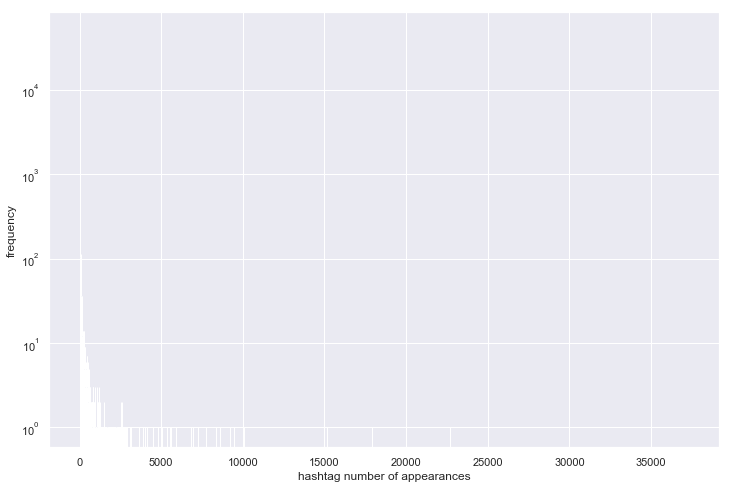

In [24]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [88]:
# counts

In [15]:
# take hashtags which appear at least this amount of times
min_appearance = 7000
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [16]:
len(popular_hashtags_set) 

12

In [89]:
med_appearance = 2500

In [111]:
frequent_set = set(popular_hashtags[
                           popular_hashtags.counts>=med_appearance
                           ]['hashtag'])

In [112]:
len(frequent_set) 

47

In [113]:
# make a new column with only the popular hashtags
hashtags_list_df_more['frequent_hashtags'] = hashtags_list_df_more.ht_list.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in frequent_set])
# # drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df_more.loc[hashtags_list_df_more.frequent_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


c:\users\lizda\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
# hashtags_list_df_more['frequent_hashtags']

In [119]:
frequent_hashtags_list_df = hashtags_list_df_more.loc[hashtags_list_df_more.frequent_hashtags.apply(lambda hashtag_list: hashtag_list != [])]


In [120]:
frequent_hashtags_list_df.shape

(6422, 6)

In [94]:
# hashtags_list_df_more[hashtags_list_df_more['popular_hashtags']!=[]].shape

In [97]:
# drop rows without popular hashtag
maga_hashtags_df = hashtags_list_df_more.loc[
            hashtags_list_df_more.popular_hashtags.apply(lambda hashtag_list: 'maga' in hashtag_list)]


In [98]:
maga_hashtags_df.shape

(184, 5)

In [100]:
# maga_hashtags_df

In [18]:
popular_hashtags_list_df.shape

(30060, 5)

In [121]:
frequent_hashtags_list_df['frequent_cnt'] = [len(x) for x in frequent_hashtags_list_df.frequent_hashtags]

c:\users\lizda\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
frequent_hashtags_list_df['frequent_cnt'].describe()

count    6422.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: frequent_cnt, dtype: float64

In [28]:
popular_hashtags_list_df.shape

(30060, 5)

In [26]:
popular_hashtags_list_df['hashtags'] = popular_hashtags_list_df.hashtags.str.replace('MakeAmericaGreatAgain', 'MAGA')

c:\users\lizda\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
all_ht = set()
for hashtag_list in popular_hashtags_list_df.ht_list:
    all_ht = all_ht | set(hashtag_list)

In [30]:
all_ht = [hashtag for hashtags_list in popular_hashtags_list_df.ht_list for hashtag in hashtags_list]

In [32]:
all_ht = set(all_ht)

In [33]:
len(all_ht)

11586

In [38]:
popular_hashtags_list_df['popular_hashtags'].describe()

count       58401
unique         57
top       [QAnon]
freq         3702
Name: popular_hashtags, dtype: object

In [ ]:
# popular_hashtags_list_df.groupby('hashtag').size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index(drop=True)

In [44]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['ht_list', 'popular_hashtags']]

for hashtag in all_ht:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))


MemoryError: 

In [36]:
hashtag_vector_df

,ht_list
5,"[CrookedHillary, LyingHillary, NeverHillary]"
9,"[terrorists, IslamExposed, MyJihad, STOPIsl..."
14,"[BlueLivesMatter, PJNET]"
19,"[MakeAmericaGreatAgain, GOPDebate]"
24,"[seattle, portland]"
25,"[IBDeditorials, PJNET]"
34,"[MakeAmericaGreatAgain, Trump2016, nationalist]"
35,"[InaugurationDay, TrumpInauguration, Trumpis..."
39,"[CrookedHillary, TrumpTrain, FeelTheBern]"
42,"[TrumpTrain, OnlyTrump, RefuzCruz]"


In [45]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

NameError: name 'hashtag_matrix' is not defined

In [107]:
#  hashtag_vector_df[100,100]

In [46]:
hashtag_matrix.columns

Index(['Syria', 'NeverHillary', 'Islam', 'CrookedHillary', 'QAnon', 'BanIslam',
       'tcot', 'StopMakingExcusesForIslam', 'StopIslam', 'BanCAIR',
       'IslamIsPureEvil', 'Obama', 'InsideSyriaMC', 'BanIslamInAmerica',
       'PJNET', 'AmericaFirst', 'BanTheBurka', 'BanCAIRNational', 'TrumpTrain',
       'HillaryClinton', 'Trump', 'MAGA', 'ISIS', 'CloseALLMosquesNOW',
       'NoDACA', '2A', 'DrainTheSwamp', 'BuildTheWall', 'IslamIsTheProblem',
       'EducateYourselfOnIslam', 'StopImportingIslam', 'SchumerShutdown',
       'Trump2016', 'islamistheproblem', 'BanTheQuran', 'ReleaseTheMemo',
       'BanShariaLaw', 'WakeUpAmerica', 'obamaistheworstpresidentever',
       'STOPIslam', 'IslamIsEvil', 'DeathCult', 'KAG'],
      dtype='object')

In [47]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

In [48]:
correlations.head()

,Syria,NeverHillary,Islam,CrookedHillary,QAnon,BanIslam,tcot,StopMakingExcusesForIslam,StopIslam,BanCAIR,...,islamistheproblem,BanTheQuran,ReleaseTheMemo,BanShariaLaw,WakeUpAmerica,obamaistheworstpresidentever,STOPIslam,IslamIsEvil,DeathCult,KAG
Syria,1.000000,-0.015904,-0.034686,-0.017449,-0.037044,-0.021499,-0.034550,-0.016805,-0.011254,-0.010483,...,-0.007621,-0.008883,-0.031941,-0.023544,-0.031262,-0.014510,-0.016581,-0.007998,-0.008941,-0.002491
NeverHillary,-0.015904,1.000000,-0.030476,-0.015331,-0.032549,-0.018890,-0.030357,-0.014766,-0.009888,-0.009211,...,-0.006696,-0.007805,-0.028065,-0.020687,-0.027468,-0.012749,-0.014569,-0.007028,-0.007856,-0.002189
Islam,-0.034686,-0.030476,1.000000,-0.033436,-0.070985,-0.041196,-0.066205,-0.032202,-0.021565,-0.020087,...,-0.014603,-0.017021,-0.061207,-0.045116,-0.059904,-0.027804,-0.031774,-0.015326,-0.017133,-0.004773
CrookedHillary,-0.017449,-0.015331,-0.033436,1.000000,-0.035710,-0.020724,-0.033305,-0.016199,-0.010848,-0.010105,...,-0.007346,-0.008563,-0.030791,-0.022696,-0.030135,-0.013987,-0.015984,-0.007710,-0.008619,-0.002401
QAnon,-0.037044,-0.032549,-0.070985,-0.035710,1.000000,-0.043998,-0.070707,-0.034392,-0.023031,-0.021454,...,-0.015596,-0.018179,-0.065369,-0.048184,-0.063978,-0.029695,-0.033934,-0.016368,-0.018299,-0.005098


In [182]:
correlations.shape

(51, 51)

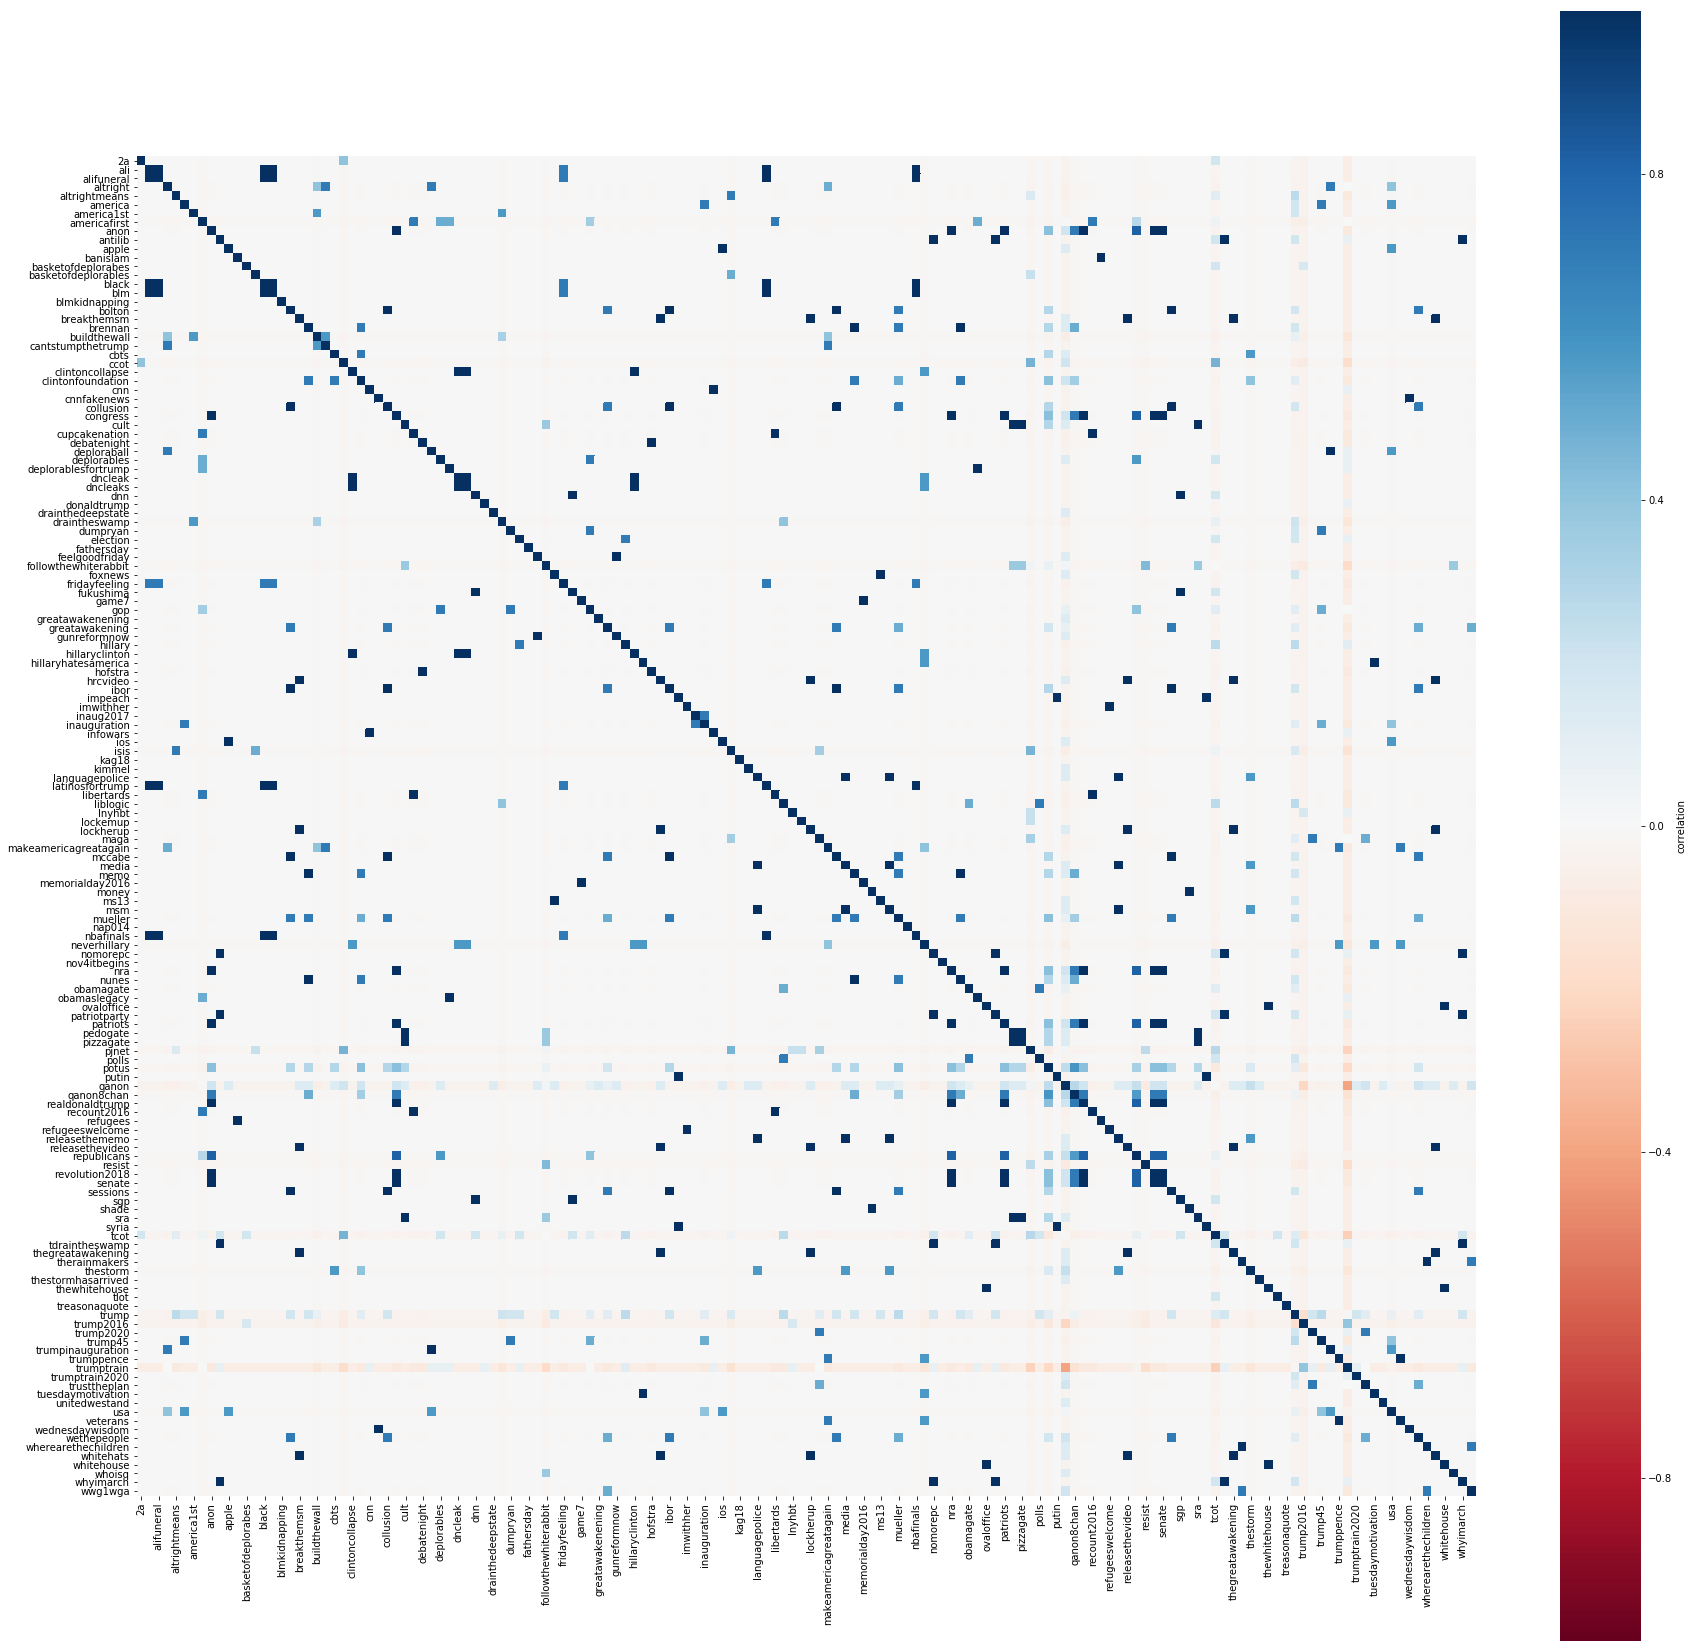

In [108]:
# plot the correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(wm_corr,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

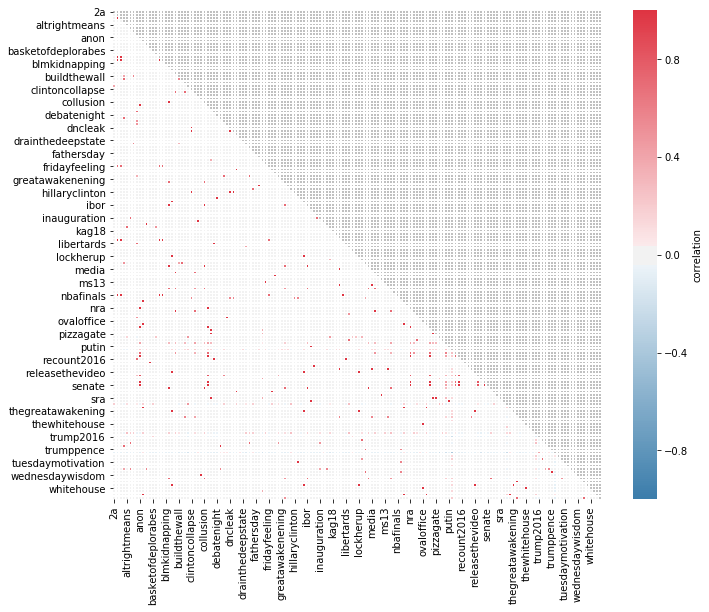

In [110]:

# Generate a mask for the upper triangle
mask = np.zeros_like(wm_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
ax.set_facecolor("silver")
# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, s=80,  as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(wm_corr, mask=mask, cmap=cmap, vmin = -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={'label':'correlation'})

In [29]:

# import bf_load as bf
# import proj_funcs as f
import networkx as nx
import matplotlib.pyplot as plt


In [57]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 


In [101]:
# import pandas and sklearn's CountVectorizer class
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['ht'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)
  
# set of documents
corpora = maga_hashtags_df.hashtags.dropna()

# instantiate the vectorizer object
cvec = CountVectorizer(lowercase=True)

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpora)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
# wm2df(wm, tokens)

In [102]:
maga_hashtags_df.hashtags

2896                                       maga, trumptrain
5663                                     maga, BuildTheWall
10721                            maga, debatenight, hofstra
11416                                      maga, trumptrain
13663                               maga, trumptrain, trump
17341                           maga, TrumpTrain, Trump2016
23327                           maga, trumptrain, trump2016
28222                                   maga, DrainTheSwamp
29860                         maga, trumptrain, DonaldTrump
39262                maga, trump, tcot, hillary, trumptrain
50230            maga, trumptrain, trump2016, pjnet, lnyhbt
59573     maga, FridayFeeling, AliFuneral, Ali, blm, bla...
62964     maga, neverhillary, HillaryClinton, ClintonCol...
65322             maga, tcot, Trump2016, basketofdeplorabes
65829                                      maga, trumptrain
66516                                   maga, FridayFeeling
72367                                   

In [62]:
corpora

array(['WakeUpAmerica, PJNET, TCOT', 'Islam, Muslims',
       'tcot, WakeUpAmerica', ..., 'ReleaseTheMemo, Unredacted, NotABot',
       'QAnon, Q, WWG1WGA, MAGA, MAGA2018',
       'MAGA, JUSTICENOW, DrainTheDeepState, TrumpsArmy'], dtype=object)

In [103]:
df = wm2df(wm, tokens)

In [68]:
# df = df.drop('')

(3240, 1328)

In [104]:
df = df.reset_index(drop=True)

In [105]:
df.head()

,2a,ali,alifuneral,altright,altrightmeans,america,america1st,americafirst,anon,antilib,...,usa,veterans,wednesdaywisdom,wethepeople,wherearethechildren,whitehats,whitehouse,whoisq,whyimarch,wwg1wga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
wm_corr = df.corr()

In [82]:
wm_corr[['maga', 'qanon']]

,maga,qanon
100daysinoffice,-0.004772,-0.012938
1776trump,-0.004772,-0.012938
1a,-0.018521,0.006326
2016taughtme,-0.004772,-0.012938
2020census,0.034769,0.023482
2a,0.232482,-0.001073
2adefenders,-0.006749,0.033214
2ashallnotbeinfringed,-0.006749,0.033214
2ndamendment,0.217376,-0.195710
34c3,-0.004772,0.023482


In [77]:
wm_corr['maga'].describe()

count    1328.000000
mean       -0.004524
std         0.037092
min        -0.080553
25%        -0.006749
50%        -0.004772
75%        -0.004772
max         1.000000
Name: maga, dtype: float64

In [139]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
links_filtered
 
# Build your graph
G=nx.from_pandas_dataframe(links_filtered, 'var1', 'var2',edge_attr=True)
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

NameError: name 'corr' is not defined

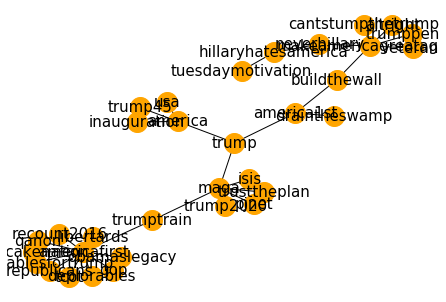

In [173]:

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links_maga.loc[ (links['value'] >=0) & (links['var1'] != links['var2']) ]
links_filtered
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2',edge_attr=True)
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

In [141]:
links_filtered[(links_filtered.var1=='maga') | (links_filtered.var2=='maga')]

,var1,var2,value


In [126]:
# Transform it in a links data frame (3 columns only):
links = wm_corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links

,var1,var2,value
0,2a,2a,1.000000
1,2a,ali,-0.005464
2,2a,alifuneral,-0.005464
3,2a,altright,-0.007749
4,2a,altrightmeans,-0.007749
5,2a,america,-0.005464
6,2a,america1st,-0.005464
7,2a,americafirst,-0.011020
8,2a,anon,-0.007749
9,2a,antilib,-0.005464


In [167]:
links['trump' in links.var1]

KeyError: False

In [137]:
links[links.value>=0.9]

,var1,var2,value
0,2a,2a,1.0
153,ali,ali,1.0
154,ali,alifuneral,1.0
166,ali,black,1.0
167,ali,blm,1.0
223,ali,latinosfortrump,1.0
240,ali,nbafinals,1.0
305,alifuneral,ali,1.0
306,alifuneral,alifuneral,1.0
318,alifuneral,black,1.0


In [154]:
links_maga = links[((links.var1=='maga') | (links.var2=='maga'))]

In [171]:
links_maga = links[((links.var1=='maga')|(links.var2.str.contains('hilary'))  | (links.var1.str.contains('hilary'))  | (links.var2.str.contains('america'))  | (links.var1.str.contains('america'))  | (links.var2=='maga'))]

In [172]:
links_maga[links_maga.value>0]

,var1,var2,value
534,altright,makeamericagreatagain,0.494505
765,america,america,1.000000
824,america,inauguration,0.705172
891,america,trump,0.190866
894,america,trump45,0.705172
902,america,usa,0.574187
918,america1st,america1st,1.000000
932,america1st,buildthewall,0.574187
953,america1st,draintheswamp,0.574187
1043,america1st,trump,0.190866


In [146]:
links.value.dtype

dtype('float64')

In [60]:
df.shape

(9724, 5251)

In [61]:
df.to_csv('Co-occurence.csv')